In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [12]:
pd.pandas.set_option('display.max_columns', None)

In [38]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop('Unnamed: 0', axis=1, inplace=True)

## Começando as análises

In [6]:
train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [7]:
train.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=166)

In [8]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [39]:
train = train[['NU_INSCRICAO','NU_IDADE','TP_ST_CONCLUSAO','IN_TREINEIRO','TP_SEXO', 'TP_COR_RACA','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO','TP_ANO_CONCLUIU']]

In [40]:
cons = pd.DataFrame({'colunas' : train.columns,
                    'tipo': train.dtypes,
                    'missing' : train.isna().sum(),
                    'size' : train.shape[0],
                    'unicos': train.nunique()})
cons['percentual'] = round(cons['missing'] / cons['size'],2)

In [41]:
colunas_numericas = list(cons[(cons['tipo'] != 'object')]['colunas'])

In [44]:
cons

,colunas,tipo,missing,size,unicos,percentual
NU_INSCRICAO,NU_INSCRICAO,object,0,13730,13730,0.00
NU_IDADE,NU_IDADE,int64,0,13730,55,0.00
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,13730,4,0.00
IN_TREINEIRO,IN_TREINEIRO,int64,0,13730,2,0.00
TP_SEXO,TP_SEXO,object,0,13730,2,0.00
TP_COR_RACA,TP_COR_RACA,int64,0,13730,6,0.00
NU_NOTA_CN,NU_NOTA_CN,float64,3389,13730,2692,0.25
NU_NOTA_CH,NU_NOTA_CH,float64,3389,13730,2978,0.25
NU_NOTA_LC,NU_NOTA_LC,float64,3597,13730,2774,0.26
NU_NOTA_COMP1,NU_NOTA_COMP1,float64,3597,13730,15,0.26


In [42]:
train[colunas_numericas]

,NU_IDADE,TP_ST_CONCLUSAO,IN_TREINEIRO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TP_ANO_CONCLUIU
0,24,1,0,1,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0,4
1,17,2,0,3,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0,0
2,21,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,25,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,28,1,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,20,1,0,1,438.2,419.7,394.5,120.0,120.0,80.0,80.0,40.0,440.0,3
13726,33,1,0,3,423.8,557.9,533.0,120.0,120.0,120.0,120.0,80.0,560.0,10
13727,15,3,1,1,460.5,528.9,569.3,120.0,120.0,120.0,120.0,120.0,600.0,0
13728,36,4,0,3,422.5,621.7,569.0,100.0,100.0,80.0,80.0,100.0,460.0,0


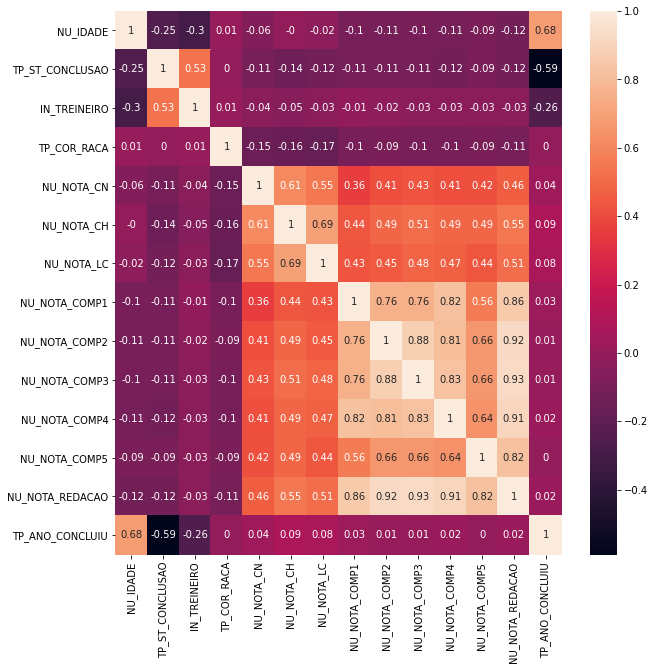

In [43]:
plt.figure(figsize = (10,10))
sns.heatmap(train[colunas_numericas].corr().round(2), annot= True)

## Random Forest

In [45]:
X = train[['TP_ST_CONCLUSAO','NU_IDADE','TP_ANO_CONCLUIU']]
y = train['IN_TREINEIRO']

In [47]:
X_train, X2_train, y_train, y2_train = train_test_split(X, y, test_size=0.2)

In [48]:
X_test = test[['TP_ST_CONCLUSAO','NU_IDADE','TP_ANO_CONCLUIU']]

In [49]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_pred = random_forest.predict(X2_train)

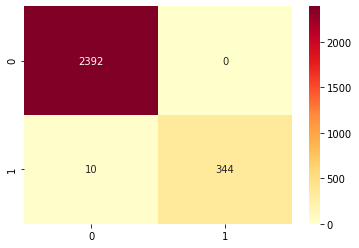

In [53]:
sns.heatmap(confusion_matrix(y2_train, y_pred),annot=True, cmap="YlOrRd" ,fmt='g')

In [54]:
print("Accuracy:",metrics.accuracy_score(y2_train, y_pred))
print("Precision:",metrics.precision_score(y2_train, y_pred))
print("Recall:",metrics.recall_score(y2_train, y_pred))

Accuracy: 0.9963583394027676
Precision: 1.0
Recall: 0.9717514124293786


In [55]:
y_pred = random_forest.predict(X_test)

In [56]:
answer = pd.DataFrame(test, columns = ['NU_INSCRICAO'])
answer['IN_TREINEIRO'] = y_pred
answer.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [57]:
answer.to_csv("answer.csv", index=False)

"score": 99.73741794310722